<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy as stats

Load the dataset into a dataframe.


In [47]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")
df.head()
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


<function matplotlib.pyplot.show(close=None, block=None)>

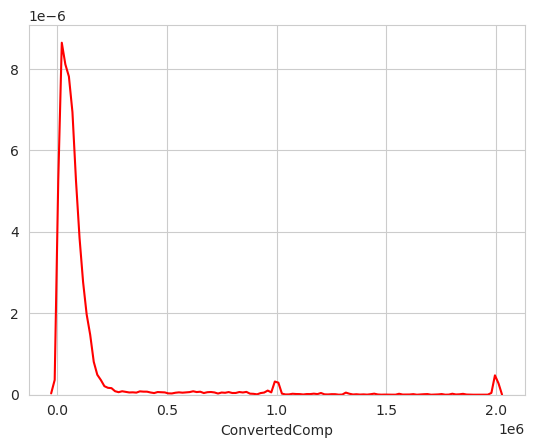

In [4]:
# your code goes here
#df['ConvertedComp']

sns.set_style('whitegrid')
sns.distplot(df['ConvertedComp'],hist=False,color='red',bins=30)
plt.show                        
                         

Plot the histogram for the column `ConvertedComp`.


<function matplotlib.pyplot.show(close=None, block=None)>

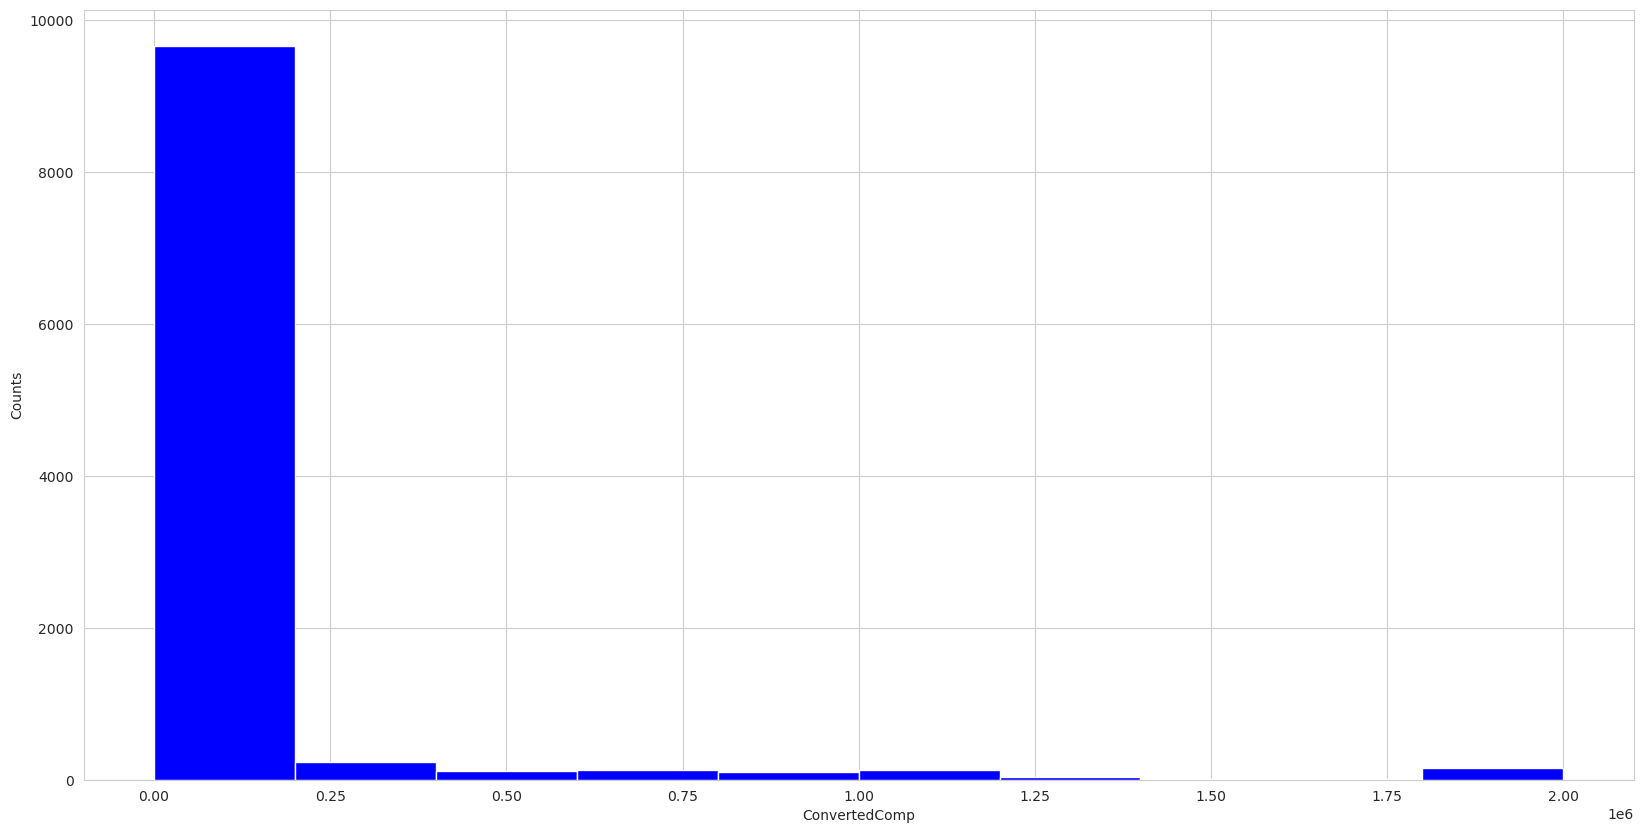

In [5]:
# your code goes here
df['ConvertedComp'].plot(kind='hist',figsize=(20,10),color='blue')
plt.title=('Histogram for ConvertedComp')
plt.ylabel('Counts')
plt.xlabel('ConvertedComp')
plt.show


What is the median of the column `ConvertedComp`?


In [6]:
# your code goes here
print(df['ConvertedComp'].median())

57745.0


How many responders identified themselves only as a **Man**?


In [7]:
# your code goes here

df['Gender'].value_counts()



Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [8]:
Median_comp_woman = df[df['Gender']=='Woman']['ConvertedComp'].median()
print(Median_comp_woman)

57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [9]:
# your code goes here
df['Age'].describe().loc[['min','25%','50%','75%','max']]

min    16.0
25%    25.0
50%    29.0
75%    35.0
max    99.0
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


<function matplotlib.pyplot.show(close=None, block=None)>

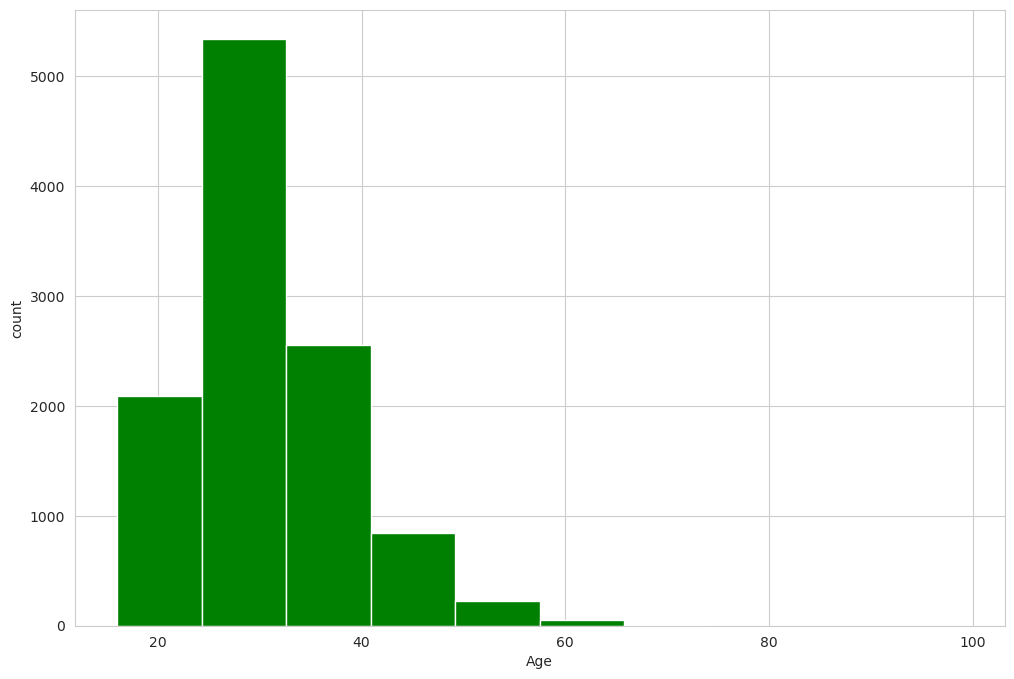

In [10]:
# your code goes here
df['Age'].plot(kind='hist',figsize=(12,8),color='green')
plt.title=('Histogram for column Age')
plt.ylabel('count')
plt.xlabel('Age')
plt.show

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


<AxesSubplot:ylabel='Age'>

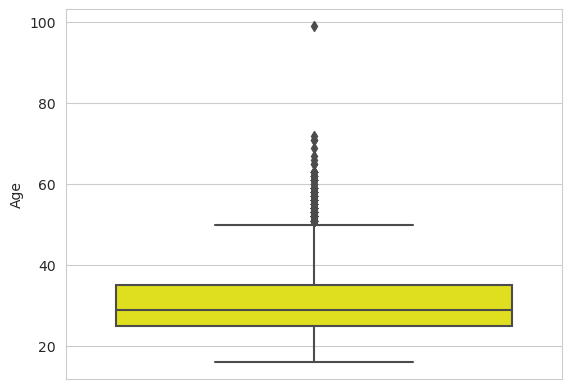

In [11]:
# your code goes here
sns.boxplot(y=df['Age'],color='yellow')

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [38]:
# your code goes here
#Define a function to find out the Outliers and Inter Quartile Range 

def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

outliers = find_outliers_IQR(df['ConvertedComp'])

print("Value of Inter Quartile Range:" ,IQR)

print(outliers)



Value of Inter Quartile Range: 73132.0
3         455352.0
13       1100000.0
45        229016.0
46       2000000.0
60       1000000.0
           ...    
11296     840000.0
11303    1000000.0
11350     300000.0
11353     260000.0
11369     701196.0
Name: ConvertedComp, Length: 879, dtype: float64


Find out the upper and lower bounds.


In [37]:
# your code goes here
q1=df['ConvertedComp'].quantile(0.25)
q3=df['ConvertedComp'].quantile(0.75)
Lower_Bound= q1-1.5*IQR
Upper_Bound= q3+1.5*IQR
print(Lower_Bound)
print(Upper_Bound)

-82830.0
209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [33]:
# your code goes here
print("Number of outliers:" + str(len(outliers)))

Number of outliers:879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [41]:
# your code goes here
#Define a function to create a new dataframe by removing the outliers
def drop_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1
# we create a dataframe named not_outliers that replaces the outlier values with a NULL. 

   not_outliers = df[~((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    
# Then we can use .dropna(), to drop the rows with NULL values.
    
   outliers_dropped = outliers.dropna().reset_index()

   return outliers_dropped

drop_outliers_IQR(df['ConvertedComp'])

,index,ConvertedComp
0,3,455352.0
1,13,1100000.0
2,45,229016.0
3,46,2000000.0
4,60,1000000.0
...,...,...
874,11296,840000.0
875,11303,1000000.0
876,11350,300000.0
877,11353,260000.0


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [51]:
# your code goes here
print(df[['Age','ConvertedComp']].corr())
print(df[['Age','CompTotal']].corr())

                    Age  ConvertedComp
Age            1.000000       0.105386
ConvertedComp  0.105386       1.000000
               Age  CompTotal
Age        1.00000    0.00697
CompTotal  0.00697    1.00000


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
